<img src="../include/header.jpg" align="left">

$ \newcommand{\inner}[2]{\langle #1,#2\rangle} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\len}[1]{\|#1\|} $
$ \newcommand{\uniquerep}{\cos\mypar{\frac{\theta}{2}} \ket{0} + e^{i\phi} \sin\mypar{\frac{\theta}{2}} \ket{1}} $

_prepared by Maksim Dimitrijev and Abuzer Yakaryilmaz_

# Unique representation

We have already discussed in the previous notebook how to obtain the unique representation $ \ket{u'} = r_1 \ket{0} + r_2 e^{i\phi} \ket{1} $ from a given quantum state $ \ket{u} =  \alpha \ket{0} + \beta \ket{1} $.

### Task 1

What is the unique representation for the quantum state $ \ket{u} = \dfrac{-i}{\sqrt{6}} \ket{0} - \dfrac{1-2i}{\sqrt{6}} \ket{1} $?

You may define the relative phase as an inverse trigonometric function or find its value by using Python.

#### Solution

Multipliying by the global factor $i$

$\ket{u} = \frac{1}{\sqrt{6}}\ket{0} - \frac{2+i}{\sqrt{6}}\ket{1}$

In [20]:
import numpy as np

a0 = np.sqrt(6)**(-1)*complex(1, 0)
a1 = np.sqrt(6)**(-1)*complex(-2, -1)
ratio = np.absolute(a1)
rho = np.angle(a1, True)
print(ratio)
print(rho)

0.912870929175277
-153.434948822922


### Task 2

Write a python function called "euler_formula" that takes a complex number $c$ and returns $ (r,\theta) $ such that $ c = r e^{i\theta} $.

Test your function with the following complex numbers ($r$ and $\theta$ values are given for the verification):

$ \begin{array}{lll}
    c_1 = 1 + i & r=\sqrt{2} & \theta = \frac{\pi}{4} \\
    c_2 = -1 + i\sqrt{3} &  r=2 & \theta = \frac{2\pi}{3}\\
    c_3 = -\sqrt{3} - i & r = 2 & \theta = \frac{7\pi}{6} \\
    c_4 = 1 - i & r=\sqrt{2} &  \theta = -\frac{\pi}{4}
\end{array}$

In [27]:
def euler_formula(c):
    return np.absolute(c), np.angle(c)

print(euler_formula(complex(-sqrt(3), -1)))
print(2, 7*np.pi/6)

(2.0, -2.617993877991494)
2 3.665191429188092


### Task 3

Write a python function "unique_representation" that takes the amplitudes of $ \ket{0} $ and $ \ket{1} $ as complex numbers and then return the components of unique representation $r_1 $, $r_2$, and $\phi$.

Test your function with the following quantum states (check our solutions for the verification of results).

- $ \ket{u_1} = \dfrac{-i}{\sqrt{6}} \ket{0} - \dfrac{1-2i}{\sqrt{6}} \ket{1} $
- $ \ket{u_2} = \dfrac{1}{\sqrt{2}} \ket{0} - \dfrac{1}{\sqrt{2}} \ket{1} $
- $ \ket{u_3} = \dfrac{i}{\sqrt{2}} \ket{0} - \dfrac{i}{\sqrt{2}} \ket{1} $
- $ \ket{u_4} = \dfrac{1-2i}{\sqrt{5}} \ket{0} $
- $ \ket{u_5} = \dfrac{2i-3}{\sqrt{13}} \ket{1} $

In [30]:
from math import sqrt

def unique_representation(c1, c2):
    ratio1, rho1 = euler_formula(c1)
    ratio2, rho2 = euler_formula(c2)
    return ratio1, ratio2, (rho2-rho1)/np.pi

states = [
    [ complex(0,-1/sqrt(6)) , complex(-1/sqrt(6),2/sqrt(6))],
    [ complex(1/sqrt(2),0) , complex(-1/sqrt(2),0) ],
    [ complex(0,1/sqrt(2)) , complex(0,-1/sqrt(2)) ],
    [ complex(1/sqrt(5),-2/sqrt(5)) , 0 ],
    [ 0 , complex(-3/sqrt(13),2/sqrt(13)) ]
]

for state in states:
    print(unique_representation(state[0], state[1]))

(0.4082482904638631, 0.912870929175277, 1.1475836176504333)
(0.7071067811865475, 0.7071067811865475, 1.0)
(0.7071067811865475, 0.7071067811865475, -1.0)
(1.0, 0, 0.35241638234956674)
(0, 1.0, 0.812832958189001)


## Visualization of quantum states

By using the unique representation, each quantum state can be visualized on three dimensions.

The unique representation has three parameters $ r_1 $, $ r_2 $, and $ \phi $. We discuss how to combine them and then visualize the quantum states of a single qubit.

### The unit circle by the relative phases

As any relative phase $ \phi \in [0,2\pi) $, it is easy to see that $ \{ e^{i\phi} \} $ forms the unit circle on the complex plane (run the cell below).

Fontconfig error: Cannot load default config file: No such file: (null)


phi in degree = 264.2
phi in radian = 4.61
phi in radian = 1.47 π


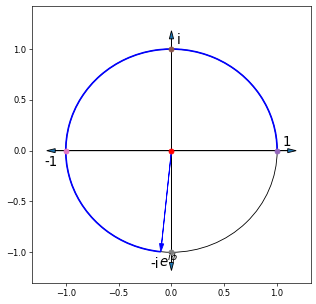

In [32]:
# load the pre-defined functions
qworld_file = "../include/qworld.py"
%run $qworld_file

from random import randrange
import matplotlib.pyplot as plt
import matplotlib.patches as pts
from math import cos, sin

phi = randrange(36000)/100 # pick a random phi value
print("phi in degree =",round(phi,1))

draw_imaginary_part()
plt.gca().add_patch( pts.Arc((0,0),2,2,angle=0,theta1=0,theta2=phi,color="blue",linewidth=2) )
phi_in_radian = 2*pi*(phi/360)
print("phi in radian =",round(phi_in_radian,2))
print("phi in radian =",round(phi_in_radian/pi,2),"π")
x = cos(phi_in_radian)
y = sin(phi_in_radian)

draw_2D_vector(x,y,"$e^{i\phi}$")

### The angle of the magnitudes

We know that $ r_1^2 + r_2^2 = 1 $ and both $ r_1 $ and $ r_2 $ are non-negative real numbers.

Thus, all $ (r_1,r_2) $ pairs form the first quadrant of the unit circle, as drawn below (run the cell).

r1 = 0.03  r2 = 1.0
r1*r1+r2*r2 = 1.0
the angle in degree (a) is  88.5
the angle in radian is 1.544
the angle in radian is 0.491 π


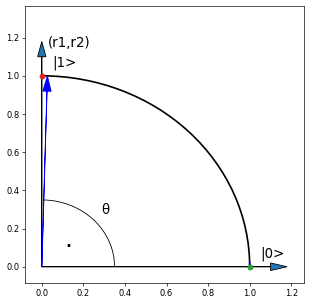

In [34]:
# load the pre-defined functions
qworld_file = "../include/qworld.py"
%run $qworld_file

from random import randrange
import matplotlib.pyplot as plt
import matplotlib.patches as pts
from math import cos, sin

theta = randrange(9000)/100 # pick a random theta value
theta_radian = theta*pi/180
r1 = cos(theta_radian)
r2 = sin(theta_radian)
print("r1 =",round(r1,2)," r2 =",round(r2,2))
print("r1*r1+r2*r2 =",round(r1*r1+r2*r2,2))

#matplotlib.pyplot.subplot(1, 2, 1)
draw_real_part()
plt.gca().add_patch( pts.Arc((0,0),2,2,angle=0,theta1=0,theta2=90,color="black",linewidth=2) )
plt.gca().add_patch( pts.Arc((0,0),2,2,angle=0,theta1=0,theta2=theta_radian,color="blue",linewidth=2) )

draw_2D_vector(r1,r2,"(r1,r2)")

plt.gca().add_patch(pts.Arc((0, 0), 0.7, 0.7, angle=0, theta1=0, theta2=theta))
rr1 = cos(theta_radian/2)
rr2 = sin(theta_radian/2)
plt.text(rr1*0.15, rr2*0.15, '.',fontsize=30)
plt.text(rr1*0.4, rr2*0.4,"θ",fontsize=16)

print("the angle in degree (a) is ",round(theta,1))
print("the angle in radian is",round(theta_radian,3))
print("the angle in radian is",round(theta_radian/pi,3),"π")

We can represent any pair $ (r_1,r_2) $ by its angle $ \theta \in [0,\pi /2] $, the angle with the $ \ket{0} $-axis:

- $ r_1 = \cos(\theta) $
- $ r_2 = \sin(\theta) $

### Combining the magnitudes and relative phase on 3D

We use the unit sphere (globe) to visualize $ ((r1,r2),\phi) $ or equivalantly $ (\theta,\phi) $.

We can place the unit circle due to $ \phi $ at the equator.

Then, potentially, we can use a semi-sphere to place the first-quadrant into the picture. But, then, we obtain a non-symmetric object. The extreme points of $ \theta $ are 0 and $ \pi/2 $, and there is only a single pole to place one of these extreme points.

One practical solution is streching the angle of magnitudes by a factor of 2 and so using both poles.

We define $ \theta \in [0,\pi] $ and place $ \ket{0} $ (resp., $\ket{1}$) to the top (resp., bottom).

r1 = 0.759  r2 = 0.651
r1*r1+r2*r2 = 1.0
the angle in degree (a) is  98.8
the angle in radian is 1.725
the angle in radian is 0.549 π


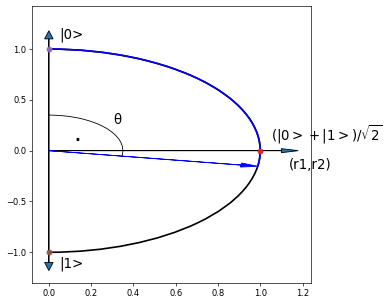

In [35]:
# load the pre-defined functions
qworld_file = "../include/qworld.py"
%run $qworld_file

from random import randrange
import matplotlib.pyplot as plt
import matplotlib.patches as pts
from math import cos, sin

theta = randrange(18000)/100 # pick a random theta value
theta_radian = theta*pi/180
r1 = cos(theta_radian/2)
r2 = sin(theta_radian/2)
x = cos(theta_radian-pi/2)
y = sin(theta_radian-pi/2)

print("r1 =",round(r1,3)," r2 =",round(r2,3))
print("r1*r1+r2*r2 =",round(r1*r1+r2*r2,2))

draw_real_part2()
plt.gca().add_patch( pts.Arc((0,0),2,2,angle=0,theta1=-90,theta2=90,color="black",linewidth=2) )
plt.gca().add_patch( pts.Arc((0,0),2,2,angle=0,theta1=theta-90,theta2=90,color="blue",linewidth=2) )

draw_2D_vector(x,y,"(r1,r2)")

plt.gca().add_patch(pts.Arc((0, 0), 0.7, 0.7, angle=0, theta1=theta-90, theta2=90))
rr1 = cos(theta_radian/2)
rr2 = sin(theta_radian/2)
plt.text(rr1*0.15, rr2*0.15, '.',fontsize=30)
plt.text(rr1*0.4, rr2*0.4,"θ",fontsize=16)

theta = 180 - theta
theta_radian = theta*pi/180
print("the angle in degree (a) is ",round(theta,1))
print("the angle in radian is",round(theta_radian,3))
print("the angle in radian is",round(theta_radian/pi,3),"π")

As the convention, the state $ \ket{0} $ is placed on the north pole, and the state $ \ket{1} $ is placed on the south pole.

Now, for the given $ \theta $ as in the figure, the magnitudes should be calculated as:

- $ r_1 = \cos \mypar{ \dfrac{\theta}{2}  } $
- $ r_2 = \sin \mypar{ \dfrac{\theta}{2}  } $

Thus, the unique representation can be written in terms of $ (\theta,\phi)  $ as

$ \ket{u} = \cos\mypar{\frac{\theta}{2}} \ket{0} + e^{i\phi} \sin\mypar{\frac{\theta}{2}} \ket{1} $.

The last step is how to integrate this new semi-circle due to $ \theta $ with the unit circle due to the relative phase $ \phi $. We use $ \dfrac{ \ket{0}+\ket{1} }{ \sqrt{2} } $ as a reference point. Its relative phase is 0 because $ e^{i\phi} = 1 $. Thus, this point coincides with the point $ 1+0i $ on the unit circle due to the relative phase.

### Bloch sphere

The unit sphere we obtain is called _Bloch sphere_.

<img src="../include/Bloch_sphere_six_states_wiki.jpg" width="45%" align="left">
<img src="../include/Bloch_sphere_wiki.png" width="30.7%" align="left">

On the left, we see the Bloch sphere with the six main reference quantum states:
- $ \ket{0} $ and $ \ket{1} $ are placed at the intersection of $z$-axis of with the unit sphere, where $ \ket{0} $ on the positive side.
- $ \ket{+} $ and $ \ket{-} $ are placed at the intersection of $x$-axis of with the unit sphere, where $ \ket{+} $ on the positive side.
- $ \ket{i} $ and $ \ket{-i} $ are placed at the intersection of $y$-axis of with the unit sphere, where $ \ket{i} $ on the positive side.

On the right, we see any quantum state on the Bloch sphere having the unique representation
$ \ket{\Psi} = \cos\mypar{\frac{\theta}{2}} \ket{0} + e^{i\phi} \sin\mypar{\frac{\theta}{2}} \ket{1} $.
- Observe that the reference axis for the angles are the $ z $-axis and $ x $-axis.

We leave the further details to the next notebook dedicated to the Bloch sphere.

## One exception of the unique representation

For any given quantum state $ \alpha \ket{0} + \beta \ket{1} $, where $ \alpha,\beta \in \mathbb{C} $, we have a unique representation in the form

$ \uniquerep $, where $ \theta \in [0,\pi] $ and $ \phi \in [0,2\pi) $.

However, there is an exception such that there are several states in the form of unique representation but still represent the same quantum state.

It is indeed the case when _the relative phase becomes a global phase_.

### Task 4

What is the exception of the uniquie representation?

It is a set of infinetely many quantum states in the form of unique representation, but any pair of states from this set is not distinguishable.

_Hint: In which case does the relative phase turns out to be a global phase?_

#### Solution

Let's closely look at the unique representation $ \uniquerep$.

For $ \theta = \pi $, the relative phase turns our to be a global phase: $ e^{i\phi} \ket{1} $.

So, the set $ \{e^{i\phi} \ket{1} \mid \phi \in [0,2\pi)\} $ has infinitely many different states, and each of them is in the form of unique representation, however, the overall set represents the singe state equivalent to $ \ket{1} $.

If we define the unique representation with the pair of angles $ (\theta,\phi) $, then indeed there are two exceptions.

### Task 5

What are the exceptions if we define the uniquie representation with the pair of angles $ (\theta,\phi) $?

#### Solution

The extreme cases for $ \theta $ are the exceptions according this definition.

- $ \{(0,\phi) \mid \phi \in [0,2\pi) \}$: all states are equivalent to $ \ket{0} $.
- $ \{(\pi,\phi) \mid \phi \in [0,2\pi) \}$: all states are equivalent to $ \ket{1} $